In [9]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [110]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-qsv7rlum/tensorflow-gpu_3ce0fd2b14fe43df99fa4e61a19f375c/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This er

In [6]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable
  Using cached mediapipe-0.10.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.5 MB)
  Using cached opencv_contrib_python-4.8.0.76-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (67.8 MB)
  Using cached sounddevice-0.4.6-py3-none-any.whl (31 kB)
  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.3
    Uninstalling protobuf-4.24.3:
      Successfully uninstalled protobuf-4.24.3


In [7]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.8.0.76-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.7 MB)


In [8]:
!pip install sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2023-10-01 08:13:33.811263: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 08:13:33.923536: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 08:13:33.925741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 08:13:36.759480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
mp_holistic = mp.solutions.holistic    # Holistic Model
mp_drawing = mp.solutions.drawing_utils    # Drawing Utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 137, 66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245, 66, 250), thickness=2, circle_radius=2)
                             )

In [9]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_BUFFERSIZE, 1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF== ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [19]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [20]:
draw_landmarks(frame, results)

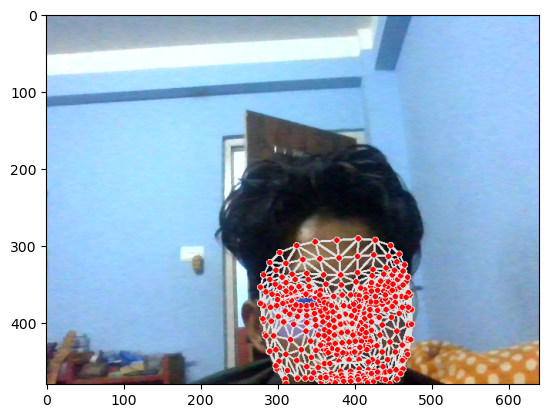

In [21]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [22]:
results

mediapipe.python.solution_base.SolutionOutputs

In [23]:
all_landmarks = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    all_landmarks.append(test)

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose, face, lh, rh])

In [25]:
extract_keypoints(results).shape

(1662,)

In [9]:
DATA_PATH = os.path.join("MP_Data")
actions = np.array(['hello', 'thanks', 'iloveyou', 'what', 'bad'])
no_sequences = 30
sequence_length = 30

In [10]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [11]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)
                
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120, 200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video NUmber {}'.format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                cv2.imshow('OpenCV Feed', image)
                
                if cv2.waitKey(10) & 0xFF== ord('q'):
                    break
cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
cap.release()
cv2.destroyAllWindows()

In [116]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 5.7 MB/s eta 0:00:000:00:01


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [13]:
label_map = {label:num for num, label in enumerate(actions)}

In [14]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'what': 3, 'bad': 4}

In [15]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
X = np.array(sequences)

In [17]:
y = to_categorical(labels).astype(int)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [121]:
x_train

array([[[ 0.43416891,  0.63234681, -0.98242331, ...,  0.06269199,
          0.27538735, -0.05270158],
        [ 0.43439007,  0.6334601 , -1.06848109, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.4344891 ,  0.63468671, -1.01288366, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.47599357,  0.52798617, -1.24249506, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47487363,  0.52437627, -1.27538729, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47484326,  0.52343053, -1.22667241, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.59429908,  0.74193126, -1.02877212, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.59387934,  0.74198335, -1.07457507, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.59376806,  0.7433176 , -1.04105937, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.6006816 ,  0.72008967, -1.03672671, ...,  

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [20]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [21]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [22]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
5/5 [==============================] - 10s 119ms/step - loss: 3.0690 - categorical_accuracy: 0.2042
Epoch 2/1000
5/5 [==============================] - 1s 116ms/step - loss: 3.2569 - categorical_accuracy: 0.2394
Epoch 3/1000
5/5 [==============================] - 1s 118ms/step - loss: 3.8954 - categorical_accuracy: 0.1831
Epoch 4/1000
5/5 [==============================] - 1s 119ms/step - loss: 1.6563 - categorical_accuracy: 0.2254
Epoch 5/1000
5/5 [==============================] - 1s 115ms/step - loss: 1.6246 - categorical_accuracy: 0.2113
Epoch 6/1000
5/5 [==============================] - 1s 113ms/step - loss: 1.6931 - categorical_accuracy: 0.2324
Epoch 7/1000
5/5 [==============================] - 1s 118ms/step - loss: 1.6485 - categorical_accuracy: 0.1831
Epoch 8/1000
5/5 [==============================] - 1s 117ms/step - loss: 1.5979 - categorical_accuracy: 0.2183
Epoch 9/1000
5/5 [==============================] - 1s 118ms/step - loss: 1.5815 - categorical_accuracy

KeyboardInterrupt: 

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596741 (2.28 MB)
Trainable params: 596741 

In [25]:
res = model.predict(x_test)

1/1 [==============================] - 1s 962ms/step


In [50]:
actions[np.argmax(res[6])]

'what'

In [27]:
model.save('action.keras')

In [55]:
model.load_weights('action.keras')

In [28]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [29]:
yhat = model.predict(x_train)

5/5 [==============================] - 0s 40ms/step


In [51]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

AxisError: axis 1 is out of bounds for array of dimension 1

In [76]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[100,  12],
        [  1,  29]],

       [[115,   0],
        [  0,  27]],

       [[114,   0],
        [ 12,  16]],

       [[115,   0],
        [  0,  27]],

       [[111,   1],
        [  0,  30]]])

In [77]:
accuracy_score(ytrue, yhat)

0.9084507042253521

In [78]:
accuracy_score(ytrue, yhat)

0.9084507042253521

In [83]:
sequence = []
sentence = []
thresold = 0.4

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_BUFFERSIZE, 1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        if res[np.argmax(res, 0)].any() > thresold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
                    
        if len(sentence) > 5:
            sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
            
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF== ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 67ms/step
hello
1/1 [==============================] - 0s 61ms/step
hello
1/1 [==============================] - 0s 59ms/step
hello
1/1 [==============================] - 0s 58ms/step
hello
1/1 [==============================] - 0s 58ms/step
hello
1/1 [==============================] - 0s 62ms/step
hello
1/1 [==============================] - 0s 63ms/step
hello
1/1 [==============================] - 0s 62ms/step
hello
1/1 [==============================] - 0s 63ms/step
hello
1/1 [==============================] - 0s 72ms/step
hello
1/1 [==============================] - 0s 74ms/step
hello
1/1 [==============================] - 0s 66ms/step
hello
1/1 [==============================] - 0s 54ms/step
hello
1/1 [==============================] - 0s 58ms/step
hello
1/1 [==============================] - 0s 63ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 61ms/step
hello
1/1 [=========

In [72]:
model.predict(x_test)

1/1 [==============================] - 0s 69ms/step


array([[2.1958907e-04, 9.0203565e-03, 1.8485467e-06, 9.9075812e-01,
        3.7229274e-08],
       [2.7770647e-01, 3.1034197e-04, 7.1685296e-01, 1.1335751e-03,
        3.9966358e-03],
       [6.5388215e-01, 2.9100073e-03, 1.1631382e-01, 1.1569924e-02,
        2.1532393e-01],
       [7.2203678e-05, 9.9413472e-01, 1.3333461e-06, 4.9274146e-05,
        5.7423892e-03],
       [2.6645404e-05, 9.9918324e-01, 6.4527921e-07, 2.7548865e-04,
        5.1393802e-04],
       [3.8714334e-05, 9.9874872e-01, 7.5753883e-07, 1.3698341e-04,
        1.0748665e-03],
       [4.5905444e-06, 5.5899749e-05, 3.1960954e-09, 9.9993950e-01,
        1.4861218e-12],
       [1.4969487e-04, 1.1891600e-02, 1.1907282e-06, 9.8795754e-01,
        3.0867678e-08]], dtype=float32)

In [61]:
cap.release()
cv2.destroyAllWindows()

In [63]:
np.argmax(res)

33